ATTEMPTS AND EXERCISES

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

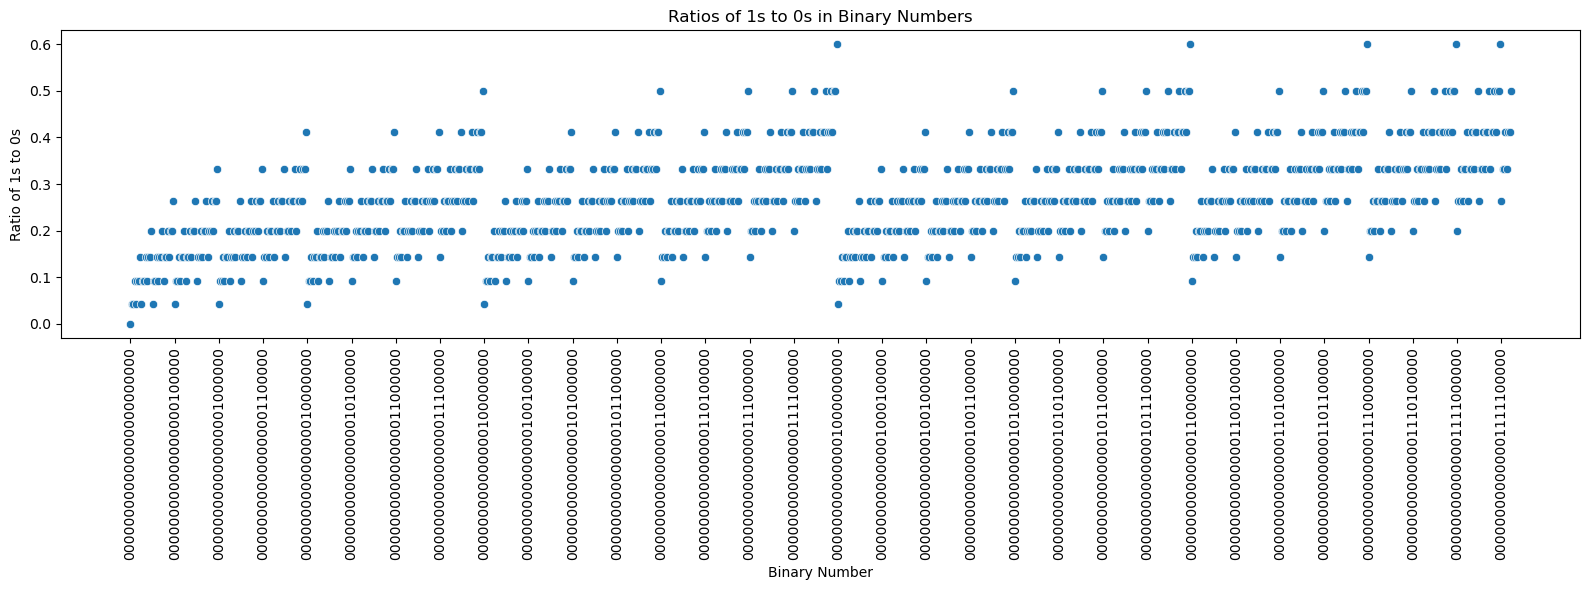

In [ ]:
# Take a sample of the first 1000 numbers
sample_nums = []

with open("numbers.txt", "r") as file:
    for f in file:
        sample_nums.append(f.strip())
        if len(sample_nums) >= 1000:
            break
    
# Create a table of ratios of 1s and 0s in each text number
df = pd.DataFrame(sample_nums)
    
# Calculate the ratio of 1s to 0s in each number
ones_count = df[0].str.count('1')
zeros_count = df[0].str.count('0')
df["ratios"] = np.where(zeros_count > 0, ones_count / zeros_count, ones_count)

# Renaming for clarity
df.rename(columns={0: "binary_number"}, inplace=True)

# Plotting the ratios
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df, x="binary_number", y="ratios")
plt.title("Ratios of 1s to 0s in Binary Numbers")
plt.xlabel("Binary Number")
plt.ylabel("Ratio of 1s to 0s")
plt.xticks(ticks=range(0, len(df["binary_number"]), 32), rotation=90)
plt.tight_layout()
plt.show()

In [120]:
# APPLYING BAYES' THEOREM

b0, b1 = 0.37, 0.27

# Labeling the prime numbers

prime_numnbers = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71,
                  73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
                  173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263,
                  269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367,
                  373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463,
                  467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569,
                  571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643,
                  647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733,
                  739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821,
                  823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887,
                  907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]

df["is_prime"] = df["binary_number"].apply(lambda x: 1 if int(x, 2) in prime_numnbers else 0)

# Separating the predictors and the target variable
X = df[["binary_number"]]
y_prime = df[["ratios", "is_prime"]].to_dict()

y = []

# Converting the target variable to a list of tuples
for key, value in y_prime.items():
    if key == "ratios":
        for i in range(len(value)):
            y.append((value[i], y_prime["is_prime"][i]))
    else:
        continue

n = len(y)

print(y)

[(0.0, 0), (0.043478260869565216, 0), (0.043478260869565216, 1), (0.09090909090909091, 1), (0.043478260869565216, 0), (0.09090909090909091, 1), (0.09090909090909091, 0), (0.14285714285714285, 1), (0.043478260869565216, 0), (0.09090909090909091, 0), (0.09090909090909091, 0), (0.14285714285714285, 1), (0.09090909090909091, 0), (0.14285714285714285, 1), (0.14285714285714285, 0), (0.2, 0), (0.043478260869565216, 0), (0.09090909090909091, 1), (0.09090909090909091, 0), (0.14285714285714285, 1), (0.09090909090909091, 0), (0.14285714285714285, 0), (0.14285714285714285, 0), (0.2, 1), (0.09090909090909091, 0), (0.14285714285714285, 0), (0.14285714285714285, 0), (0.2, 0), (0.14285714285714285, 0), (0.2, 1), (0.2, 0), (0.2631578947368421, 1), (0.043478260869565216, 0), (0.09090909090909091, 0), (0.09090909090909091, 0), (0.14285714285714285, 0), (0.09090909090909091, 0), (0.14285714285714285, 1), (0.14285714285714285, 0), (0.2, 0), (0.09090909090909091, 0), (0.14285714285714285, 1), (0.14285714285

In [119]:
learning_rate = 0.1

print("Training process simulation:")

for i in range(7):
    # calculate adjustment based on current error and learning rate
    b0_gradient = 0
    b1_gradient = 0

    # calcuate gradient descent on all data-points1
    for data in y:
        xi = data[0]
        yi = data[1]

        yhat_i = b0 + b1 * xi 
        error = yhat_i - yi

        # Partial derivatives of the MSE loss function
        b0_gradient += error
        b1_gradient += error * xi

    # calculate the average of all gradients
    b0_gradient = (2 / n) * b0_gradient
    b1_gradient = (2 / n) * b1_gradient

    # calculate your updated weights 
    b0 = b0 - learning_rate * b0_gradient
    b1 = b1 - learning_rate * b1_gradient
    
    # measure your new error
    total_error = 0
    for data in y:
        yi = data[1]
        xi = data[0]
    
        # B0 + B1 * X
        yhat_i = b0 + (b1 * xi)
        # calculate squared residual
        error = (yi - yhat_i)**2

        # add up error
        total_error += error / n

    print("Iteration", i+1, "we get weights:", b0, b1, "with error:", round(total_error, 4))


Training process simulation:
Iteration 1 we get weights: 0.547190257495634 0.240152999620659 with error: 0.3349
Iteration 2 we get weights: 0.45853538049211845 0.21681465702582237 with error: 0.2599
Iteration 3 we get weights: 0.38885703261993715 0.19858940949413326 with error: 0.2135
Iteration 4 we get weights: 0.3340870251518586 0.1843808797805739 with error: 0.185
Iteration 5 we get weights: 0.29102932012012955 0.17332773580842215 with error: 0.1673
Iteration 6 we get weights: 0.2571730559410516 0.1647533009587062 with error: 0.1564
Iteration 7 we get weights: 0.23054565718410336 0.1581259670615628 with error: 0.1497
